#1)-Library import


In [4]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets


#2)-Data Import and exploration

In [ ]:
path = 'https://github.com/platzi/algebra-aplicada/tree/master/03 - Algebra Lineal Aplicada - Analisis de Componentes Principales (PCA)/imagenes'
im = imageio.imread(path)

In [5]:
data= sklearn.datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


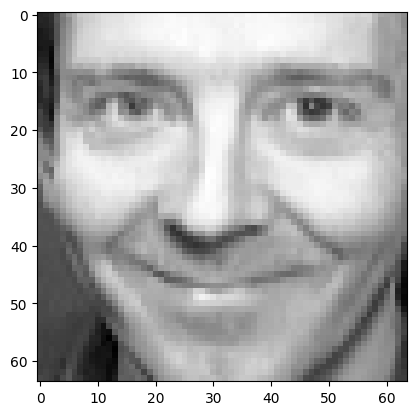

In [14]:
imagen_1 = data.data[26].reshape(64, 64)
imagen_2 = data.data[1].reshape(64, 64)
plt.imshow(data.data[26].reshape(64,64), cmap='gray')

We check if the data is normalized

In [10]:
print('Max original', end=' ')
print(np.amax(imagen_1))
print('Min original', end=' ')
print(np.amin(imagen_1))

Max original 0.87603307
Min original 0.08264463


In [15]:
imagen_1*255

array([[ 43.20248 ,  46.363636,  52.68595 , ..., 145.41322 , 138.03719 ,
        126.44628 ],
       [ 44.2562  ,  43.20248 ,  50.57851 , ..., 146.46693 , 138.03719 ,
        124.338844],
       [ 41.095043,  43.20248 ,  48.471073, ..., 146.46693 , 140.14462 ,
        125.39256 ],
       ...,
       [ 62.169422,  65.33058 ,  62.169422, ..., 108.53306 ,  67.43801 ,
         55.847107],
       [ 64.276855,  68.49174 ,  64.276855, ...,  96.94215 ,  67.43801 ,
         61.115704],
       [ 71.65289 ,  68.49174 ,  63.22314 , ...,  86.40496 ,  64.276855,
         63.22314 ]], dtype=float32)

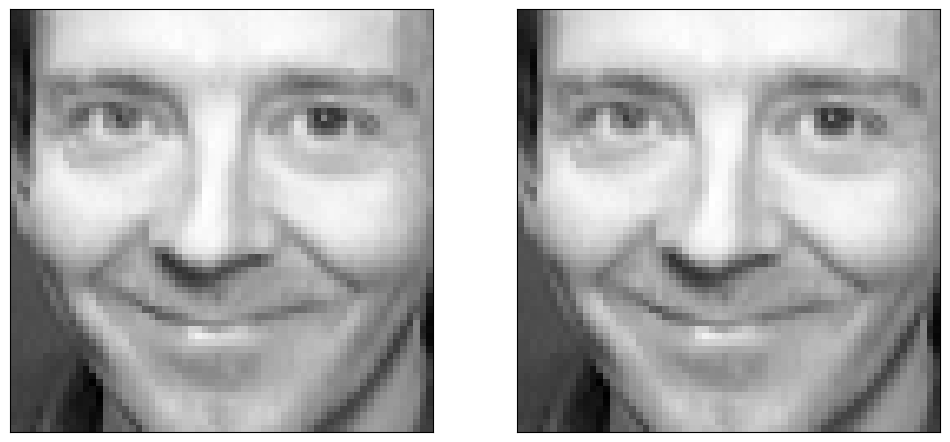

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,12),
                       subplot_kw = {'xticks':[], 'yticks':[]})
ax[0].imshow(imagen_1*255, cmap = 'gray')
ax[1].imshow(imagen_1, cmap = 'gray')

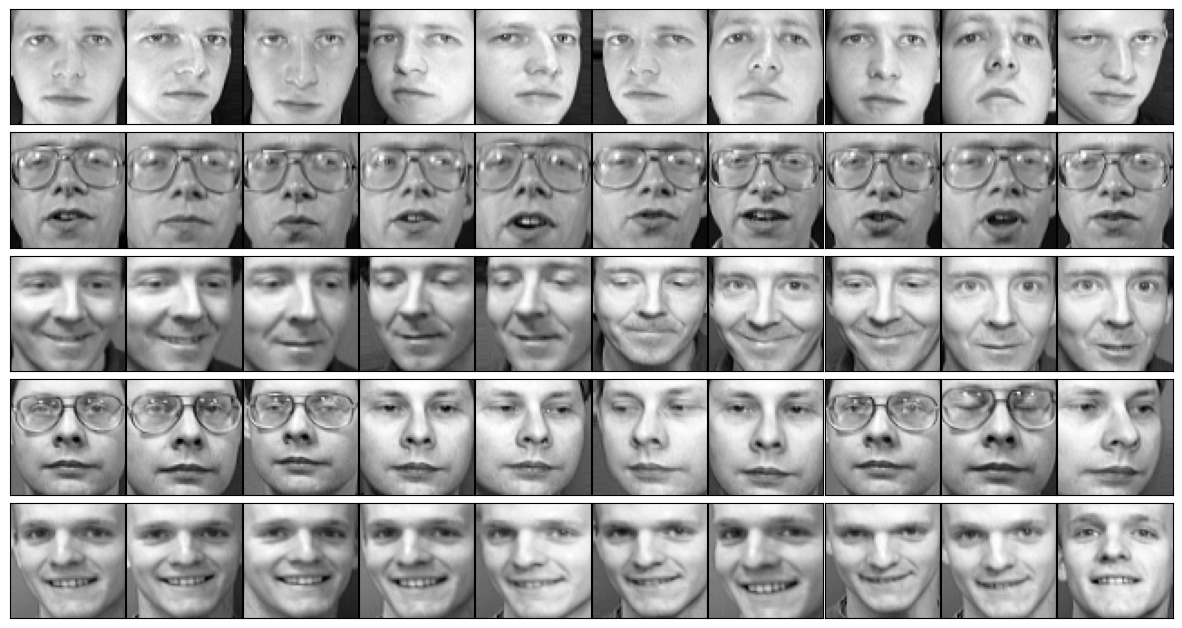

In [25]:
from glob import iglob

caras = pd.DataFrame([])

for i in range(50):
  cara = data.data[i].reshape(64,64)
  caraa = pd.Series(cara.flatten(), name=i)
  caras = pd.concat([caras, caraa], axis=1)

caras = caras.T

fig, axes = plt.subplots(5,10, figsize=(15,8),
                         subplot_kw = {'xticks': [], 'yticks': [],},
                         gridspec_kw = dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(caras.iloc[i].values.reshape(64,64),cmap='gray')

#3)-PCA over images


In [26]:
from sklearn.decomposition import PCA

In [40]:
caras_pca = PCA(n_components = 0.8)
caras_pca.fit(caras)

PCA(n_components=0.8)

In [41]:
# Verificar la varianza explicada por cada componente principal
explained_variance_ratio = caras_pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Varianza explicada por cada componente principal:")
print(explained_variance_ratio)
print("Varianza explicada acumulada:")
print(cumulative_variance)

Varianza explicada por cada componente principal:
[0.26583967 0.14363109 0.11840125 0.05811815 0.04794904 0.03695562
 0.03018169 0.02688334 0.02381761 0.01940091 0.01821152 0.01660348]
Varianza explicada acumulada:
[0.26583967 0.40947074 0.52787197 0.58599013 0.63393915 0.67089474
 0.70107645 0.7279598  0.7517774  0.7711783  0.78938985 0.8059933 ]


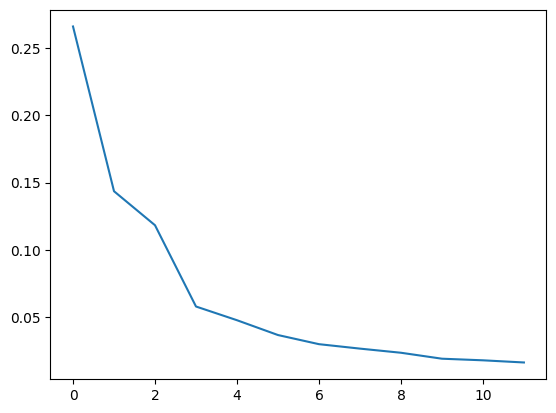

In [42]:
plt.plot(explained_variance_ratio)
plt.show()

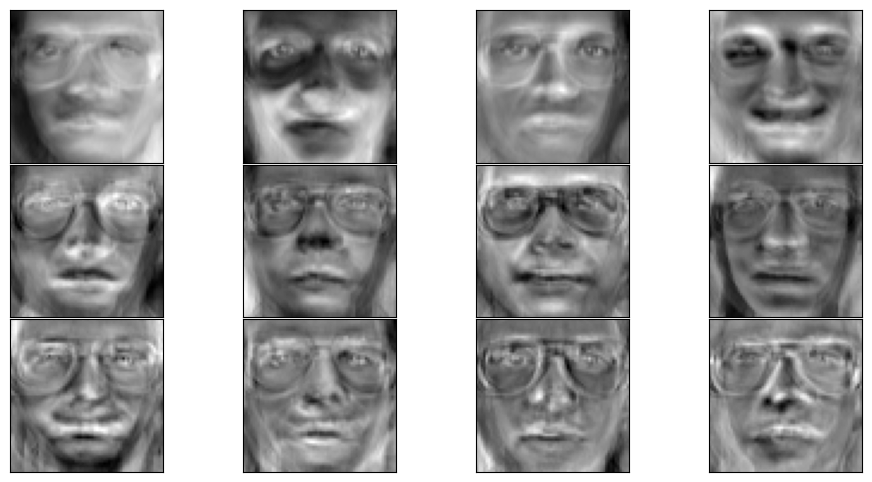

In [43]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas,columnas, figsize=(12,6),
                         subplot_kw = {'xticks': [], 'yticks': [],},
                         gridspec_kw = dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(caras_pca.components_[i].reshape(64,64),cmap='gray')

In [44]:
print(caras_pca.n_components_)

12


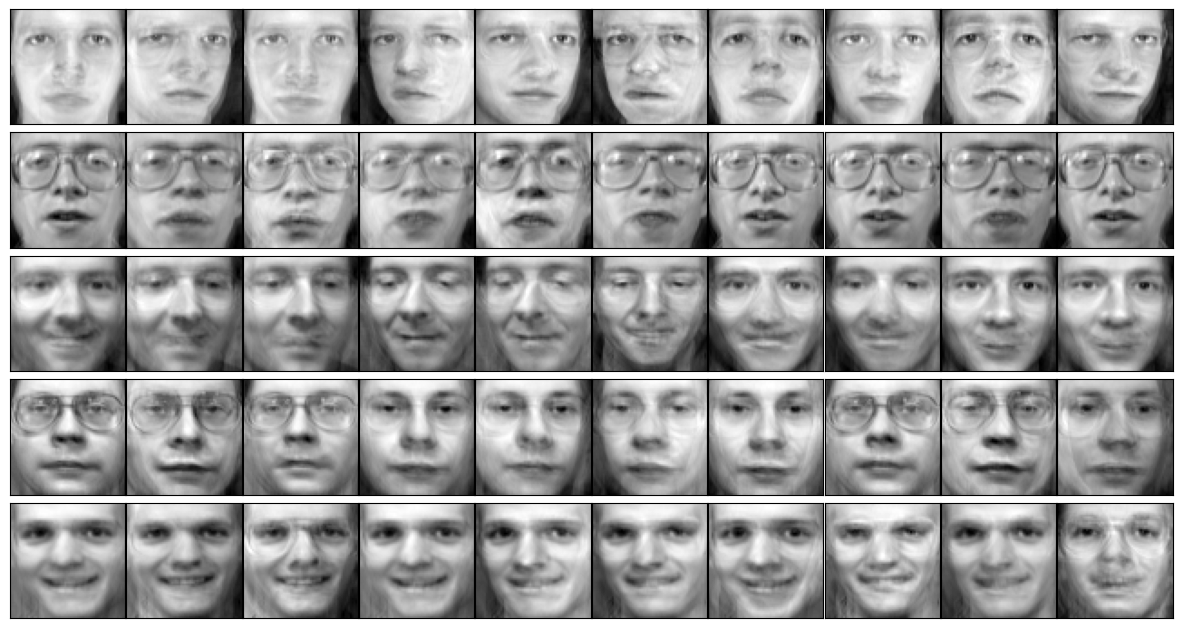

In [45]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

fig, axes = plt.subplots(5,10, figsize=(15,8),
                         subplot_kw = {'xticks': [], 'yticks': [],},
                         gridspec_kw = dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(proyeccion[i].reshape(64,64),cmap='gray')